<a href="https://colab.research.google.com/github/ian-mutai0/Week9-Independent-Project/blob/main/SpamBase_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# SPAMBASE DATASET

# 1.0 Defining the Question

## a) Specifying the data analytic question

> Predict whether an e-mail is spam (1) or not (0)

## b) Defining the metric for success

> To be able to create a model using the Naive Bayes Classifier that can predict whether an email is spam or not. 

## c) Understanding the Context

> Our dataset contains very many numerical columns and the target column has been named as '1'. The target variable has two classes which are; 
- 1 - email is spam 
- 0 - email is not spam. 

## d) Recording the Experimental Design 

> - Import the relevant libraries that we will use in our analysis
- Read and explore the dataset we will use for our project
- Define the appropriateness of the available data with regards to the project
- Find and deal with outliers, anomalies, and missing data within the dataset.
- Perform univariate, bivariate and multivariate analysis recording your observations.
- Implement our solution by creating a Naive Bayes Classifier that can help us predict whether an email is spam or not. 
- Challenge the solution by giving insights on how we can optimize the performance of our model to give us the best prediction accuracy.
- Provide recommendations based on our analysis and modelling techniques.

## e) Data Relevance

# 2.0 Reading the Data

In [29]:
# Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [30]:
# Loading the spambase dataset
# Loading the names files first so that we can use the column names in our dataset
with open("spambase.names") as f:
  print(f.read())

# Reading the spambase dataset
spam = pd.read_csv('/content/spambase.data')

# Renaming the columns in our dataset
spam.columns = ['word_freq_make','word_freq_address','word_freq_all','word_freq_3d','word_freq_our','word_freq_over','word_freq_remove','word_freq_internet','word_freq_order','word_freq_mail','word_freq_receive','word_freq_will','word_freq_people','word_freq_report','word_freq_addresses','word_freq_free','word_freq_business','word_freq_email','word_freq_you','word_freq_credit','word_freq_your','word_freq_font','word_freq_000','word_freq_money','word_freq_hp','word_freq_hpl','word_freq_george','word_freq_650','word_freq_lab','word_freq_labs','word_freq_telnet','word_freq_857','word_freq_data','word_freq_415','word_freq_85','word_freq_technology','word_freq_1999','word_freq_parts','word_freq_pm','word_freq_direct','word_freq_cs','word_freq_meeting','word_freq_original','word_freq_project','word_freq_re','word_freq_edu','word_freq_table','word_freq_conference','char_freq_;','char_freq_(','char_freq_[','char_freq_!','char_freq_$','char_freq_#','capital_run_length_average','capital_run_length_longest','capital_run_length_total','class']

| SPAM E-MAIL DATABASE ATTRIBUTES (in .names format)
|
| 48 continuous real [0,100] attributes of type word_freq_WORD 
| = percentage of words in the e-mail that match WORD,
| i.e. 100 * (number of times the WORD appears in the e-mail) / 
| total number of words in e-mail.  A "word" in this case is any 
| string of alphanumeric characters bounded by non-alphanumeric 
| characters or end-of-string.
|
| 6 continuous real [0,100] attributes of type char_freq_CHAR
| = percentage of characters in the e-mail that match CHAR,
| i.e. 100 * (number of CHAR occurences) / total characters in e-mail
|
| 1 continuous real [1,...] attribute of type capital_run_length_average
| = average length of uninterrupted sequences of capital letters
|
| 1 continuous integer [1,...] attribute of type capital_run_length_longest
| = length of longest uninterrupted sequence of capital letters
|
| 1 continuous integer [1,...] attribute of type capital_run_length_total
| = sum of length of uninterrupted sequences of

# 3.0 Checking the Data

In [31]:
# Displaying the number of columns and rows in our spambase dataset
spam.shape

(4600, 58)

In [32]:
# Displaying the top of the spambase dataset
spam.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


In [33]:
# Displaying the bottom of the spambase dataset
spam.tail()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
4595,0.31,0.0,0.62,0.0,0.00,0.31,0.0,0.0,0.0,0.0,0.0,1.88,0.00,0.0,0.0,0.0,0.0,0.0,0.62,0.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.31,0.31,0.31,0.0,0.0,0.000,0.232,0.0,0.000,0.0,0.0,1.142,3,88,0
4596,0.00,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,6.00,0.0,2.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,2.00,0.0,0.0,0.000,0.000,0.0,0.353,0.0,0.0,1.555,4,14,0
4597,0.30,0.0,0.30,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,1.80,0.30,0.0,0.0,0.0,0.0,0.9,1.50,0.0,0.30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,1.20,0.0,0.0,0.102,0.718,0.0,0.000,0.0,0.0,1.404,6,118,0
4598,0.96,0.0,0.00,0.0,0.32,0.00,0.0,0.0,0.0,0.0,0.0,0.32,0.00,0.0,0.0,0.0,0.0,0.0,1.93,0.0,0.32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.32,0.00,0.32,0.0,0.0,0.000,0.057,0.0,0.000,0.0,0.0,1.147,5,78,0
4599,0.00,0.0,0.65,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.00,0.65,0.0,0.0,0.0,0.0,0.0,4.60,0.0,0.65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,1.97,0.65,0.0,0.0,0.000,0.000,0.0,0.125,0.0,0.0,1.250,5,40,0


In [34]:
# Checking the datatypes of our columns and confirming whether they are appropriate
spam.dtypes

word_freq_make                float64
word_freq_address             float64
word_freq_all                 float64
word_freq_3d                  float64
word_freq_our                 float64
word_freq_over                float64
word_freq_remove              float64
word_freq_internet            float64
word_freq_order               float64
word_freq_mail                float64
word_freq_receive             float64
word_freq_will                float64
word_freq_people              float64
word_freq_report              float64
word_freq_addresses           float64
word_freq_free                float64
word_freq_business            float64
word_freq_email               float64
word_freq_you                 float64
word_freq_credit              float64
word_freq_your                float64
word_freq_font                float64
word_freq_000                 float64
word_freq_money               float64
word_freq_hp                  float64
word_freq_hpl                 float64
word_freq_ge

In [35]:
# Checking the number of unique classes in each column
# From the dataset, we can notice that besides all columns being numerical
# only a few contain integers. These will be of our main interest

# We can start with the 'capital_run_length_longest' column
print(spam['capital_run_length_longest'].unique())

[ 101  485   40   15    4   11  445   43    6   61    7   24   55   31
   95   91    9   66   12    5   22   10   30   78  121   38  130    8
  193   17   59   34   47    3  287   13  245   16   45   29  280   27
   64   20   26  144   23  140  763   32   19  131   60   79   96  304
  595  149   49   53   33  335   25   21    2  132   35   18  186   46
  107   99   71   48   28  300   62    1   14   85   68 1038  223   41
  583  363  418  147   42  116   51  119   94  117   50   44   73   39
   92  295   63   52   75   58 2042   67  489   97 2204   54  669   72
  113   36  158   90   74   37  739 1171  104   69  138  169  103  494
  283   87  611   93  123  133 1170  183  129  394  102  798   76   56
  146  128  209  159  232 1505  772  110  164  153  260  279  114  274
   82  190   70 1327  154  515   77  286  181  350  525  259  111 1146
  581  105   89  696  137  268   65  151  124  447 1325  636  266  139
  634  148  136  299  135  412  404  689  127  272 1333  296  332  376
  126 

In [36]:
# We can also check for the unique values in the 'capital_run_length_total' column
print(spam['capital_run_length_total'].unique())

[ 1028  2259   191    54   112    49  1257   749    21   184   261    25
   205   249   107   461    70   186    23    34    69    82  2258    47
    36   129    59    43    89    17   264    29   239   285   226    28
    68   339   774   442    94  3040   898    33   179   750   176   106
   146    51   200   284    66    75    96   180   121   194   303   141
   290   187   281   110   236   318   100  1066   175    10   114   519
    61   118   213   158   845    38  3038  2453   102    91   313   222
    30   292   168    74    67   211    78   507   588   583   308   195
  2413   982   278   657   164   170   450    95   144   174    76   730
   304    11    13    77  1001   123   131   190   120   203   291   117
   607   642   437   119   111   108   260   944   172   566   574   130
    85   152   326   694   537   153     7   240   101   979    63   181
   212   255   256   363   137   165    81  1733   233    57   965  1329
   242   841   476   143   305   354   156  1087   

In [37]:
# We can check for the unique values in the 'class' column
print(spam['class'].unique())

[1 0]


> This makes sense since this is our target variable, whose two classes are whether a message is spam(1) or not(0)

# 4.0 External Data source Validation

Making sure your data matches something outside of the dataset is very important. It allows you to ensure that the measurements are roughly in line with what they should be and it serves as a check on what other things might be wrong in your dataset. External validation can often be as simple as checking your data against a single number, as we will do here.

An example would be suppose that you're working with a dataset on the population of countries during the year 2016. Validating such information with an external reliable resource such as World Bank Data would be important step to providing credibility to your dataset. Have a look at the following link for an example. Link.

### a. Validation

# 5.0 Data Cleaning

## a) Validity

## b) Accuracy

## c) Completeness

In [38]:
# Checking whether our dataset has null/missing values
spam.isnull().any()

word_freq_make                False
word_freq_address             False
word_freq_all                 False
word_freq_3d                  False
word_freq_our                 False
word_freq_over                False
word_freq_remove              False
word_freq_internet            False
word_freq_order               False
word_freq_mail                False
word_freq_receive             False
word_freq_will                False
word_freq_people              False
word_freq_report              False
word_freq_addresses           False
word_freq_free                False
word_freq_business            False
word_freq_email               False
word_freq_you                 False
word_freq_credit              False
word_freq_your                False
word_freq_font                False
word_freq_000                 False
word_freq_money               False
word_freq_hp                  False
word_freq_hpl                 False
word_freq_george              False
word_freq_650               

> We can determine that there are no missing or null values in our dataset. 

## d) Consistency

In [39]:
# Checking for duplicated values
spam.duplicated().any()

True

In [40]:
# Checking the number of duplicates in the dataset
spam.duplicated().sum()

391

In [41]:
# Dealing with the duplicated values
spam.drop_duplicates(inplace=True)

In [42]:
# Checking the new shape after dropping the duplicates
spam.shape

(4209, 58)

> We were able to determine that the dataset had 391 duplicated values which we swiftly removed so as to avoid errors during our analysis

## e) Uniformity

## f) Checking for Outliers

In [43]:
# Checking for outliers using the Inter Quantile Range(IQR)
Q1 = spam.quantile(0.25)
Q3 = spam.quantile(0.75)
IQR = Q3 - Q1

# Removing outliers based on the IQR range 
new_spam = spam[~((spam < (Q1 - 1.5 * IQR)) | (spam > (Q3 + 1.5 * IQR))).any(axis=1)]

# Printing the shape of our new dataset
print(new_spam.shape)

# Printing the shape of our old dataset
print(spam.shape)

(114, 58)
(4209, 58)


> Removing the outliers from our dataset would completely make the dataset lose meaning as most records will be dropped. Due to this, we opt not to remove the outliers and instead work on the dataset with the outliers present. 

# 6.0 Exploratory Data Analysis

- Based on the fact that there are so many numerical variables, it will be difficult to do analysis for specific columns.
- The column '1' is categorical since we only have two classes, 1 and 0. 
- We will perform univariate data analysis on the '1' email column using the frequency table and a pie chart. 

## 6.1 Univariate Data Analysis

### 6.1.1 Categorical Variables

#### i) Frequency Table

In [27]:
# Considering that 1 - email is spam, 0 - email is not a spam
# We can check for the frequency distribution in our dataset
spam['class'].value_counts() 

0    2788
1    1812
Name: class, dtype: int64

> From the frequency table, we can tell that majority of the emails are not spam. In this case, 2788 emails are not spam while 1812 are spam. 

#### ii) Pie Chart

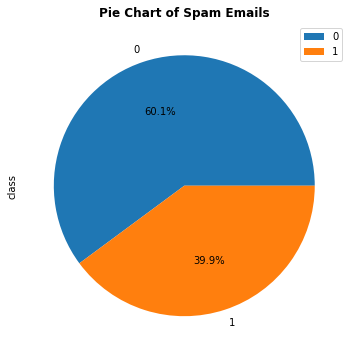

In [44]:
# Pie chart of the spam emails 
spam['class'].value_counts().plot(kind='pie', autopct='%1.1f%%')
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.legend(loc='upper right')
plt.title('Pie Chart of Spam Emails', y=1, fontweight='bold')
plt.show()

> From the pie chart, we can tell that 60.1% of the emails are not spam while 39.9% are spam emails.

## 6.2 Bivariate Data Analysis

### 6.2.1 Numerical and Numerical Variables

#### i) Correlation 

In [45]:
# Heatmaps can be used to show the correlation between the numerical variables
# But in this case it will be difficult to visualize so we will use the normal matrix
spam.corr()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
word_freq_make,1.000000,0.034114,0.063267,0.005384,0.021740,0.055040,0.011037,-0.004392,0.103818,0.040799,0.063007,0.075919,0.061960,0.032249,0.022439,0.065451,0.081447,0.051765,0.120575,0.020910,0.121471,-0.025585,0.126457,0.205676,-0.075085,-0.063494,-0.048104,-0.050075,-0.041556,-0.054262,-0.038913,-0.031647,-0.042731,-0.026335,-0.046101,-0.057318,-0.058801,-0.008632,-0.011215,-0.035484,-0.005291,-0.026562,-0.025621,-0.022991,-0.037874,-0.034472,-0.000956,-0.018914,-0.027262,-0.019680,-0.034798,0.059236,0.101934,-0.009158,0.044779,0.059132,0.084126,0.129321
word_freq_address,0.034114,1.000000,0.027609,-0.008936,0.036983,0.005623,0.077468,0.013781,0.053525,0.184441,0.060819,0.026228,0.015628,0.012465,0.061887,0.046615,0.022112,0.178408,0.055852,-0.006690,0.117780,0.001249,0.007145,0.061350,-0.053488,-0.044550,-0.011172,-0.032939,-0.026005,-0.029359,-0.015895,0.028897,-0.032530,0.026085,-0.025472,-0.028196,0.003843,-0.012693,-0.016159,0.002379,-0.019317,-0.035865,0.037745,-0.029024,0.020116,-0.025952,-0.012319,-0.020919,0.014782,-0.028209,-0.019394,0.031702,0.044449,0.030702,0.029373,0.053866,0.034601,0.100346
word_freq_all,0.063267,0.027609,1.000000,-0.019895,0.065681,0.066608,0.028630,0.007263,0.077618,0.025201,0.055700,0.065723,0.036484,0.004928,0.104609,0.061927,0.029889,0.110528,0.126490,0.030903,0.147883,-0.039446,0.106747,0.031186,-0.092635,-0.066418,-0.081269,-0.051435,-0.057823,-0.030483,-0.036585,-0.063558,-0.057977,-0.063396,-0.048938,-0.047555,-0.074279,0.031767,-0.017389,-0.045985,-0.030803,-0.007592,-0.052705,-0.056865,-0.056554,-0.060529,0.027397,-0.029448,-0.036754,-0.024462,-0.035780,0.097231,0.073000,-0.004503,0.095684,0.092511,0.051967,0.172193
word_freq_3d,0.005384,-0.008936,-0.019895,1.000000,0.000256,-0.009167,0.014286,0.003798,-0.001044,-0.003849,-0.013195,-0.018576,-0.013156,0.003377,0.005373,0.005799,-0.002831,0.016592,-0.009932,-0.005008,0.004578,0.030587,0.014712,0.025849,-0.015706,-0.014033,-0.009712,-0.010632,-0.007933,-0.010914,-0.007656,-0.006969,-0.008248,-0.006977,-0.005909,-0.006312,-0.007440,-0.002724,-0.004508,-0.007656,-0.006076,-0.008320,-0.009387,-0.006115,-0.013182,-0.009434,-0.003410,-0.001862,-0.000030,-0.011450,-0.007516,-0.003861,0.008269,0.000133,0.005754,0.022106,0.023784,0.056407
word_freq_our,0.021740,0.036983,0.065681,0.000256,1.000000,0.041392,0.135958,0.023410,0.014482,0.027232,0.079165,0.055008,0.020656,0.001586,0.048309,0.079199,0.137869,0.050814,0.083092,0.027838,0.142992,-0.022716,0.062136,0.000320,-0.076785,-0.079809,-0.062483,-0.064151,0.039627,-0.053614,-0.042054,-0.024256,-0.034750,-0.024556,-0.051059,-0.052211,-0.077684,0.133057,-0.045513,-0.017580,-0.052325,0.107706,-0.054583,0.002770,-0.049499,-0.083315,-0.028146,-0.035040,-0.035049,-0.054583,-0.027988,0.019205,0.040696,0.002144,0.050832,0.042985,-0.010498,0.230117
word_freq_over,0.055040,0.005623,0.066608,-0.009167,0.041392,1.000000,0.046844,0.079683,0.097012,0.010068,0.056568,0.001589,0.067254,0.007918,0.139996,0.016688,0.057658,0.059395,0.083323,0.057489,0.105705,0.006859,0.181734,0.059413,-0.086713,-0.089548,-0.0

# 7.0 Implementing the Solution

## Classification Prediction using Naive Bayes Classifier

> Preview the dataset to understand the columns we will use in our modelling

In [46]:
# Previewing the spam dataset
spam.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1


> Next, we define the attributes and labels in our spam dataset

In [47]:
# Define the predictor and target variables
X = spam.iloc[:, :-1].values# Feature/Predictor/Independent variables
y = spam['class'].values # Label

### i) 80-20 train and test set split

> Split the spam dataset into train and test sets using the 80/20 split for the first instance

In [50]:
# Split the data in the 80/20 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

> Perform feature scaling using standardization

In [51]:
# Feature scaling 
# Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

> Import the Naive Bayes library from sklearn
- Initialize the Multinomial Naive Bayes Classifier for training and prediction. Reason being Multinomial Naive Bayes Classifier is most suited for text classification purposes. 
- Fit the model with the train set of our spam dataset

In [52]:
# Import the Naive Bayes library and from it get the MultinomialNB class
from sklearn.naive_bayes import MultinomialNB

# Introduce the Multinomial object and fit the train set 
multi = MultinomialNB()
multi.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

> Next we make predictions and evaluate the performance of our MultinomialNB model using the following metrics:
- Classification report (accuracy, precision, recall and f1 score)
- Confusion matrix to tell us how many correct predictions were made

In [53]:
# Making predictions using our MultinomialNB classifier
y_pred_multi = multi.predict(X_test)

# Import the metrics libraries
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred_multi))
print(classification_report(y_test, y_pred_multi))

[[261 222]
 [  4 355]]
              precision    recall  f1-score   support

           0       0.98      0.54      0.70       483
           1       0.62      0.99      0.76       359

    accuracy                           0.73       842
   macro avg       0.80      0.76      0.73       842
weighted avg       0.83      0.73      0.72       842



> Evaluate the model's performance using the accuracy score metric

In [54]:
# Import the accuracy score metric from sklearn
from sklearn.metrics import accuracy_score
print("The accuracy score of our 80-20 split MultinomialNB model:", accuracy_score(y_test, y_pred_multi)*100)

The accuracy score of our 80-20 split MultinomialNB model: 73.15914489311164


> From the classification report, we can see that we have achieved an accuracy score of 73.16% as the 80-20 split MultinomialNB classifier made 616 out of 842 correct predictions. 

What happens when we use different data splits ?

### ii) 70-30 train and test set split

> Split the spam dataset into train and test sets using the 70/30 split for the second instance

In [55]:
# Define the predictor and target variables
X = spam.iloc[:, :-1].values# Feature/Predictor/Independent variables
y = spam['class'].values # Label

In [56]:
# Split the data in the 70/30 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [57]:
# Feature scaling 
# Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [58]:
# Import the Naive Bayes library and from it get the MultinomialNB class
from sklearn.naive_bayes import MultinomialNB

# Introduce the Multinomial object and fit the train set 
multi = MultinomialNB()
multi.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

> Next we make predictions and evaluate the performance of our MultinomialNB model using the following metrics:

- Classification report (accuracy, precision, recall and f1 score)
- Confusion matrix to tell us how many correct predictions were made

In [59]:
# Making predictions using our MultinomialNB classifier
y_pred_multi2 = multi.predict(X_test)

# Import the metrics libraries
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred_multi2))
print(classification_report(y_test, y_pred_multi2))

[[400 340]
 [  5 518]]
              precision    recall  f1-score   support

           0       0.99      0.54      0.70       740
           1       0.60      0.99      0.75       523

    accuracy                           0.73      1263
   macro avg       0.80      0.77      0.72      1263
weighted avg       0.83      0.73      0.72      1263



> Evaluate the model using the accuracy score metric

In [60]:
# Import the accuracy score metric from the sklearn library
from sklearn.metrics import accuracy_score
print("The accuracy score of our 70-30 split MultinomialNB model: ", accuracy_score(y_test, y_pred_multi2)*100)

The accuracy score of our 70-30 split MultinomialNB model:  72.68408551068883


> As we can see from the classification report, the accuracy score has slightly reduced to 72.68% after changing the split to 70-30 as the model was able to make 918 out of 1263 correct predictions as seen from the confusion matrix. 

### iii) 60-40 train and test split

> Split the spam dataset into train and test sets using the 60/40 split for the third instance

In [61]:
# Define the predictor and target variables
X = spam.iloc[:, :-1].values# Feature/Predictor/Independent variables
y = spam['class'].values # Label

In [62]:
# Split the data in the 60/40 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [63]:
# Feature scaling 
# Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [64]:
# Import the Naive Bayes library and from it get the MultinomialNB class
from sklearn.naive_bayes import MultinomialNB

# Introduce the Multinomial object and fit the train set 
multi = MultinomialNB()
multi.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

> Next we make predictions and evaluate the performance of our MultinomialNB model using the following metrics:

- Classification report (accuracy, precision, recall and f1 score)
- Confusion matrix to tell us how many correct predictions were made

In [65]:
# Making predictions using our MultinomialNB classifier
y_pred_multi3 = multi.predict(X_test)

# Import the metrics libraries
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred_multi3))
print(classification_report(y_test, y_pred_multi3))

[[506 482]
 [ 12 684]]
              precision    recall  f1-score   support

           0       0.98      0.51      0.67       988
           1       0.59      0.98      0.73       696

    accuracy                           0.71      1684
   macro avg       0.78      0.75      0.70      1684
weighted avg       0.82      0.71      0.70      1684



> Evaluate the model using the accuracy score metric

In [66]:
from sklearn.metrics import accuracy_score
print("The accuracy score of the 60-40 split MultinomialNB model: ", accuracy_score(y_test, y_pred_multi3)*100)

The accuracy score of the 60-40 split MultinomialNB model:  70.66508313539192


> After switching the split to 60/40, we can determine from the classification report that the accuracy score has reduced to 70.67% as the model was able to make 1190 out of 1684 correct predictions. 

## Findings

> - The highest accuracy score of 73.16% was achieved with the 80-20 split MultimonialNB classifier 
- As we reduced the train and test data split, we noticed a reduction in the accuracy score. This means that with decrease in the train and test data splits, the accuracy score reduces as observed in the classification reports.
- Although the highest accuracy score was 73.15%, this score is quite low thus begging the question, how can we improve on its model performance ?


# 8.0 Challenging the Solution 

- We can challenge our solution by implementing the different types of Naive Bayes classifiers i.e Gaussian and Bernoulli for comparison purposes in terms of performance.
- We can attempt normalizing the data as a method of optimizing the performance of the classifier.
- We can also challenge the solution by dropping the highly correlated variables as a way of performing feature selection.

## a) Gaussian Naive Bayes Classifier

Application for this classifier is when the data follows a normal distribution and thus is best suited when all our features are continuous. 

> The first thing we can do is a normality test i.e Shapiro-Wilks just to dtermine whether our data follows a Gaussian distribution. 

In [67]:
# Using the Shapiro-Wiks function to test for normality

# Imporing the shapiro function
from scipy.stats import shapiro 

# Testing for normality
stat, p = shapiro(spam)
print('Statistics=%.3f, p=%.3f' % (stat, p))

# Interpreting the p-value while comparing with the alpha
# to determine if the data is Gaussian
alpha = 0.05
if p > alpha:
	print('Data looks Gaussian')
else:
	print('Data does not look Gaussian')

Statistics=0.037, p=0.000
Data does not look Gaussian


/usr/local/lib/python3.7/dist-packages/scipy/stats/morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


We've established that our spam data does not follow a normal distribution after testing using the Shapiro-Wilks test

We can still go ahead and assess the performance of our Gaussian Naive Bayes classifier on our dataset just for comparison purposes.

> We define the attributes and labels in our spam dataset

In [74]:
# Define the predictor and target variables
X = spam.iloc[:, :-1].values# Feature/Predictor/Independent variables
y = spam['class'].values # Label

> We will split the data using the 80-20 ratio for comparison purposes

In [75]:
# Split the data in the 80/20 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

> Perform feature scaling to our dataset

In [76]:
# Feature scaling 
# Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

> - Import the Naive Bayes library from sklearn

- Initialize the Gaussian Naive Bayes Classifier for training and prediction.
- Gaussian Naive Bayes Classifier is most suited for data that follows a normal distribution. Fit the model with the train set of our spam dataset

In [77]:
from sklearn.naive_bayes import GaussianNB

# Introduce the Gaussian object and fit the train set 
normal = GaussianNB()
normal.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [78]:
# Making predictions using our MultinomialNB classifier
y_pred_norm = normal.predict(X_test)

# Import the metrics libraries
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred_norm))
print(classification_report(y_test, y_pred_norm))

[[472  11]
 [159 200]]
              precision    recall  f1-score   support

           0       0.75      0.98      0.85       483
           1       0.95      0.56      0.70       359

    accuracy                           0.80       842
   macro avg       0.85      0.77      0.77       842
weighted avg       0.83      0.80      0.79       842



In [79]:
# Import accuracy score metric
from sklearn.metrics import accuracy_score
print("The accuracy score of our 80-20 split GaussianNB classifier: ", accuracy_score(y_test, y_pred_norm)*100)

The accuracy score of our 80-20 split GaussianNB classifier:  79.80997624703087


### Findings

> - Surprisingly enough, the GaussianNB classifier is an improvement on our MultiNomialNB classifier simply despite the spam data not following a normal/Gaussian distribution.
- The accuracy was higher (79.81%) as compared to the accuracy score of the initial MultinomialNB classifier.
- The Gaussian classifier was able to make 672 correct predictions out of 842 total predictions.

## b) Normalizing the data

Normalization rescales the values on individual observations to have a unit norm.

> We define the attributes and labels in our spam dataset

In [81]:
# Define the predictor and target variables
X = spam.iloc[:, :-1].values# Feature/Predictor/Independent variables
y = spam['class'].values # Label

> We will split the data using the 80-20 ratio for comparison purposes

In [82]:
# Split the data in the 80/20 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

> Import the Normalizer class from the preprocessing library

In [83]:
# Load the preprocessing libraries from sklearn
# Import the Normalizer class
from sklearn.preprocessing import Normalizer

> Create Normalizer object and transform the spam data

In [84]:
# Create normalizer
normalizer = Normalizer(norm='l2')

# Transform feature matrix
normalizer.transform(X)

array([[2.03297105e-04, 2.71062806e-04, 4.84040726e-04, ...,
        4.95076854e-03, 9.77762266e-02, 9.95187732e-01],
       [2.59683978e-05, 0.00000000e+00, 3.07292708e-04, ...,
        4.25059392e-03, 2.09911216e-01, 9.77710178e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.81192865e-02, 2.04911354e-01, 9.78451717e-01],
       ...,
       [2.53812946e-03, 0.00000000e+00, 2.53812946e-03, ...,
        1.18784459e-02, 5.07625892e-02, 9.98330921e-01],
       [1.22759766e-02, 0.00000000e+00, 0.00000000e+00, ...,
        1.46672345e-02, 6.39373781e-02, 9.97423098e-01],
       [0.00000000e+00, 0.00000000e+00, 1.59858723e-02, ...,
        3.07420620e-02, 1.22968248e-01, 9.83745986e-01]])

> - Import the Naive Bayes library from sklearn
- Initialize the Multinomial Naive Bayes Classifier for training and prediction. Reason being Multinomial Naive Bayes Classifier is most suited for text classification purposes.
- Fit the model with the train set of our spam dataset

In [85]:
from sklearn.naive_bayes import MultinomialNB

# Introduce the MultinumialNB object and fit the train set 
multi = MultinomialNB()
multi.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

> - Next we make predictions and evaluate the performance of our MultinomialNB model using the following metrics:
- Classification report (accuracy, precision, recall and f1 score)
- Confusion matrix to tell us how many correct predictions were made

In [86]:
# Making predictions using our MultinomialNB classifier
y_pred_multi4 = multi.predict(X_test)

# Import the metrics libraries
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred_multi4))
print(classification_report(y_test, y_pred_multi4))

[[419  64]
 [ 92 267]]
              precision    recall  f1-score   support

           0       0.82      0.87      0.84       483
           1       0.81      0.74      0.77       359

    accuracy                           0.81       842
   macro avg       0.81      0.81      0.81       842
weighted avg       0.81      0.81      0.81       842



> Evaluate the performance of the model using the accuracy score

In [87]:
# Import the accuracy score metric from the library 
from sklearn.metrics import accuracy_score
print("The accuracy score of the MultinomialNB classifier using normalized data: ", accuracy_score(y_test, y_pred_multi4)*100)

The accuracy score of the MultinomialNB classifier using normalized data:  81.47268408551069


### Findings

> - We can acknowledge that the MultinomialNB classifier works better with normalized data as it has given us a higher prediction accuracy of 81.47% as compared to the initial MultinomialNB classifier which gave us an accuracy score of 73.15.
- Additionally, the classifier was able to make 686 out of 842 correct predictions. 

## c) Feature Selection

We can perform feature selection by dropping the highly correlated variables in our dataset using 95% percentile value as the limit

> Create a correlation matrix and identify highly correlated variables

In [88]:
# Create correlation matrix
corr_matrix = spam.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

> Drop the highly correlated variables from our spam dataset

In [89]:
# Drop features 
spam.drop(spam[to_drop], axis=1)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
1,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.00,0.06,0.06,0.0,0.0,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
2,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.0,0.0,0.000,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,0.00,1.88,0.00,0.00,0.00,0.00,0.00,0.00,0.62,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.31,0.31,0.31,0.0,0.0,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4596,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,6.00,0.00,2.00,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,2.00,0.0,0.0,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4597,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.80,0.30,0.00,0.00,0.00,0.00,0.90,1.50,0.00,0.30,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.00,0.00,1.20,0.0,0.0,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4598,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.32,0.00,0.00,0.00,0.00,0.00,0.00,1.93,0.00,0.32,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.32,0.00,0.32,0.0,0.0,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


> We define the attributes and labels in our spam dataset

In [90]:
# Define the predictor and target variables
X = spam.iloc[:, :-1].values# Feature/Predictor/Independent variables
y = spam['class'].values # Label

> We will split the data using the 80-20 ratio for comparison purposes

In [91]:
# Split the data in the 80/20 ratio
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

> Perform feature scaling to our dataset

In [92]:
# Feature scaling 
# Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

> - Import the Naive Bayes library from sklearn
- Initialize the Multinomial Naive Bayes Classifier for training and prediction. Reason being Multinomial Naive Bayes Classifier is most suited for text classification purposes.
- Fit the model with the train set of our spam dataset

In [93]:
from sklearn.naive_bayes import MultinomialNB

# Introduce the MultinomialNB object and fit the train set 
multi = MultinomialNB()
multi.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

> Next we make predictions and evaluate the performance of our MultinomialNB model using the following metrics:
- Classification report (accuracy, precision, recall and f1 score)
- Confusion matrix to tell us how many correct predictions were made

In [94]:
# Making predictions using our MultinomialNB classifier
y_pred_multi5 = multi.predict(X_test)

# Import the metrics libraries
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred_multi5))
print(classification_report(y_test, y_pred_multi5))

[[261 222]
 [  4 355]]
              precision    recall  f1-score   support

           0       0.98      0.54      0.70       483
           1       0.62      0.99      0.76       359

    accuracy                           0.73       842
   macro avg       0.80      0.76      0.73       842
weighted avg       0.83      0.73      0.72       842



> Evaluate the performance using the accuracy score metric

In [95]:
# Import the accuracy score metric from the library
from sklearn.metrics import accuracy_score
print("The accuracy score of our MultinomialNB after performing feature selection: ", accuracy_score(y_test, y_pred_multi5)*100)

The accuracy score of our MultinomialNB after performing feature selection:  73.15914489311164


### Findings

> - After feature selection, the MultinomialNB classifier had a similar accuracy score as compared to the initial MultinomialNB classifier which definitely means that for this dataset feature selection by way of dropping highly correlated variables doesn't help optimize the overall performance of our classifier. 
- The accuracy score of the classifier after feature selection was 73.16% which is no different from the accuracy score of the initial MultinomialNB classifier. 

# 9.0 Recommendations

> In order to achieve the highest accuracy score when it comes to prediciting whether an email is spam or not in our spambase dataset, I would recommend the following steps: 
- Split the data in the 80-20 train and test data split. This is because it was observed that when the train and test data split was reduced, the accuracy score of the classifier also reduced. 
- Use a MultinomialNB classifier as it is best suited for text classification problems. Gaussian on the other hand works best with data that follows a normal distribution. 
- Normalize the data. After normalizing our data, the classifier was able to achieve a higher accuracy score as compared to when the data was not normalized. 
